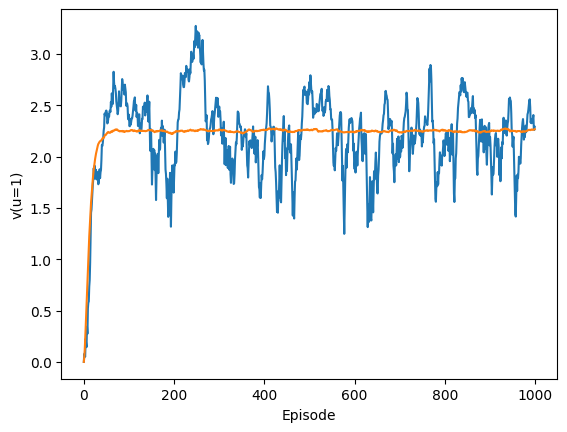

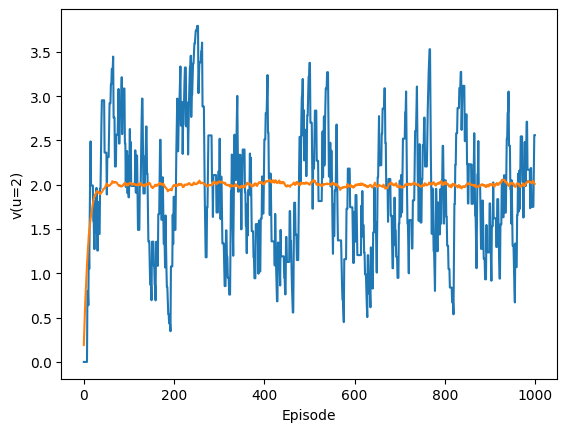

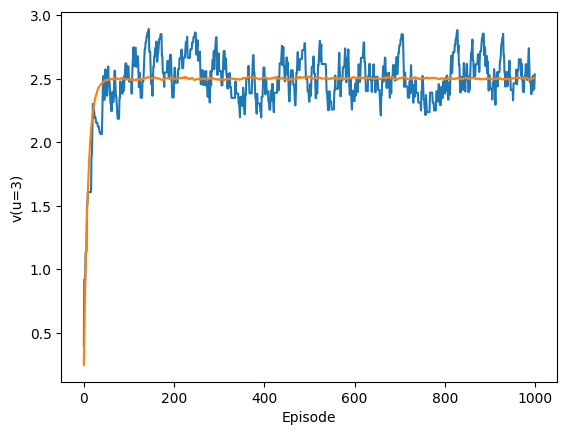

In [60]:
import numpy as np
import matplotlib.pyplot as plt

class Environment:
    def __init__(self) -> None:
        self.state = 0
        self.terminated = False

    def reset(self):
        self.state = 0
        self.terminated = True

    def new_ep(self):
        self.terminated = False

    def get_state(self):
        return self.state

    def get_reward(self, action):
        if self.state == 0:
            reward = 0
        elif self.state == 1:
            rewards = [4,0]
            reward = rewards[action]
        elif self.state == 2:
            rewards = [2,3]
            reward = rewards[action]
        return reward

    def take_step(self,  action):
        self.terminated = False
        reward = self.get_reward(action)
        if self.state == 0:
            self.state = self.state + 1 + action
        else:
            # there is no further state
            self.reset()
        return reward



class Agent:
    def __init__(self, env, epsilon_a=0.075, policy_type="random", epsilon_c=0.2, decay=0, beta=1) -> None:
        self.vs = np.zeros(3)
        self.ms = [[0, 0], [0, 0], [0, 0]]
        self.policy = [[0.5, 0.5], [0.5, 0.5], [0.5, 0.5]]
        self.policy_type = policy_type
        self.env = env
        self.epsilon_a = epsilon_a
        self.epsilon_c = epsilon_c
        self.decay = decay
        self.beta = beta

    def reset_agent(self):
        # reset at the start of a new epoch
        self.vs = np.zeros(3)
        self.ms = [[0, 0], [0, 0], [0, 0]]
        self.policy = [[0.5, 0.5], [0.5, 0.5], [0.5, 0.5]]

    def critic(self):
        return self.vs

    def actor(self):
        #state = env.state
        action = np.random.choice(np.arange(2), p=self.policy[state])
        return action

    def update_policy(self, state, reward, new_state, action):
        if state == 0:
            delta = reward + self.vs[new_state] - self.vs[state]
        else:
            delta = reward - self.vs[state]
        for a in range(len(self.ms[state])):
            self.ms[state][a] = (1 - self.decay) * self.ms[state][a] + self.epsilon_a * self.delta_func(action, a) * delta
            self.policy[state] = self.softmax(self.ms[state])
        return self.policy

    def update_weights(self, reward, state, new_state):
        if state == 0:
            delta = reward + self.vs[new_state] - self.vs[state]
        else:
            delta = reward - self.vs[state]

        self.vs[state] += self.epsilon_c * delta

        return self.vs

    def softmax(self, x):
        for i in range(len(x)):
            x[i] = self.beta * x[i]
        return np.exp(x) / np.exp(x).sum()

    def delta_func(self, a, b):
        return a == b


# policy evaluation for "maze" environment
episodes = 1000
epochs = 1000
epsilon = 0.1

env_maze = Environment()
agent_maze = Agent(env=env_maze, epsilon_a=epsilon, policy_type="actor_critic")
v_over_epochs_pe_maze = np.zeros((epochs, episodes, 3))
for epoch in range(epochs):
    agent_maze.reset_agent()

    for episode in range(episodes):
        for step in range(2):
            if env_maze.terminated == False:
                state = env_maze.get_state()
                vs = agent_maze.critic()
                action = agent_maze.actor()
                reward = env_maze.take_step(action)
                new_state = env_maze.get_state()
                agent_maze.update_weights(reward, state, new_state)

        v_over_epochs_pe_maze[epoch, episode] = vs
        env_maze.new_ep()

# plot policy evaluation for "maze" environment
means_per_epoch_1_pe_maze = np.mean(v_over_epochs_pe_maze[:, :, 0], axis=0)
plt.plot(range(epochs), v_over_epochs_pe_maze[0, :, 0])
plt.plot(range(epochs), means_per_epoch_1_pe_maze)
plt.xlabel("Episode")
plt.ylabel("v(u=1)")
plt.show()

means_per_epoch_2_pe_maze = np.mean(v_over_epochs_pe_maze[:, :, 1], axis=0)
plt.plot(range(epochs), v_over_epochs_pe_maze[0, :, 1])
plt.plot(range(epochs), means_per_epoch_2_pe_maze)
plt.xlabel("Episode")
plt.ylabel("v(u=2)")
plt.show()

means_per_epoch_3_pe_maze = np.mean(v_over_epochs_pe_maze[:, :, 2], axis=0)
plt.plot(range(epochs), v_over_epochs_pe_maze[0, :, 2])
plt.plot(range(epochs), means_per_epoch_3_pe_maze)
plt.xlabel("Episode")
plt.ylabel("v(u=3)")
plt.show()


In [51]:

# policy evaluation for "maze" environment
trials = 1000
epochs = 1000
epsilon = 0.1

env_maze = Environment()
agent_maze = Agent(env=env_maze, epsilon_a=epsilon, policy_type="actor_critic")
v_hist = np.zeros((epochs, trials, 3))
policy_hist = np.zeros((epochs, trials, 6))


for epoch in range(epochs):
    agent_maze.reset_agent()

    for trial in range(trials):
        for step in range(2):
            if not env_maze.terminated:
                state = env_maze.state
                v = agent_maze.vs
                action = np.random.choice(np.arange(2), p=agent_maze.policy[state])
                reward = env_maze.take_step(action)
                new_state = env_maze.state
                policy = agent_maze.update_policy(state, reward, new_state, action)
                if new_state != 0:
                    delta = reward + agent_maze.vs[new_state] - agent_maze.vs[state]
                else:
                    delta = reward - agent_maze.vs[state]

                agent_maze.vs[state] += agent_maze.epsilon_c * delta

        v_hist[epoch, trial] = v

        # Print the shapes of policy[0], policy[1], and policy[2]
        # Print the shapes of policy[0], policy[1], and policy[2]
        #print("Shapes:", np.array(policy[0]).shape, np.array(policy[1]).shape, np.array(policy[2]).shape)


        # Adjust the concatenation based on the actual shapes
        policy_hist[epoch, trial] = np.concatenate((policy[0], policy[1], policy[2]), axis=0)


        env_maze.new_ep()





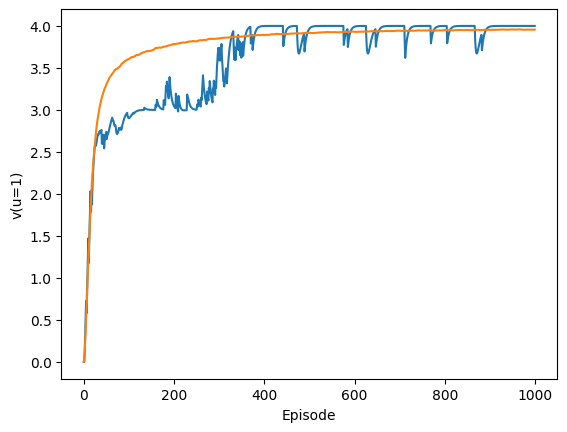

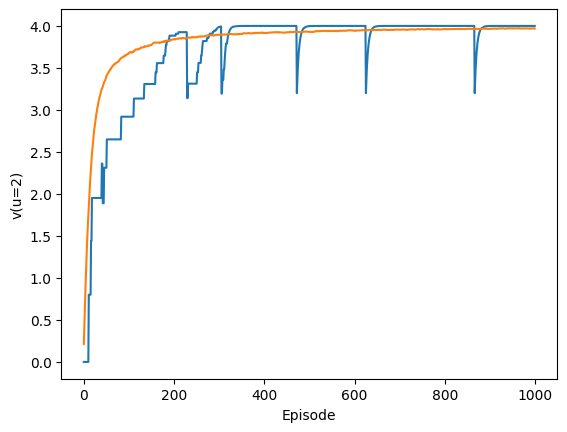

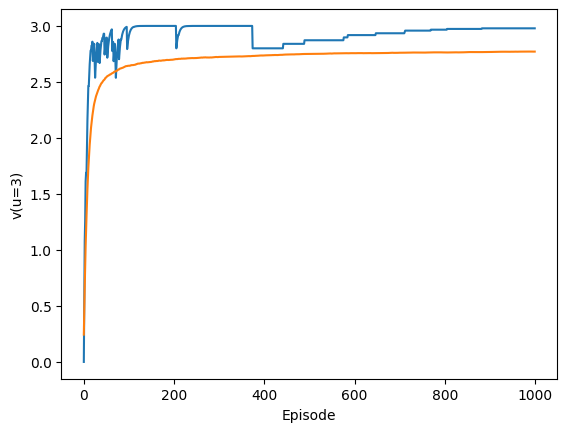

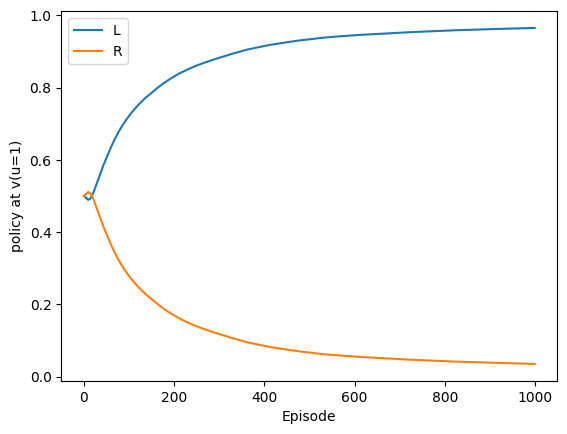

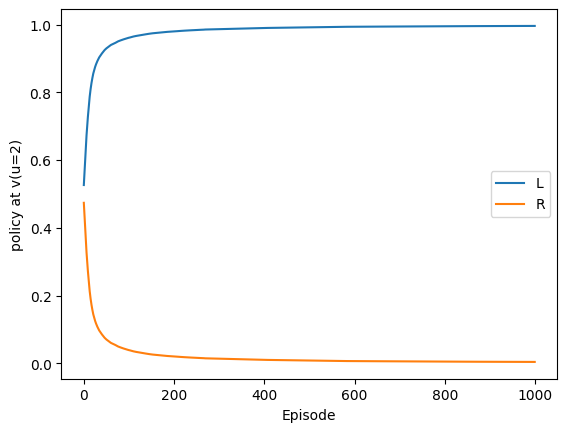

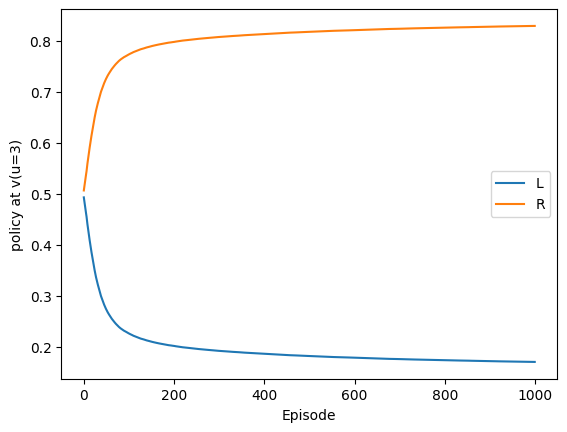

In [59]:
means_per_epoch_1 = np.mean(v_hist[:,:,0], axis=0)
plt.plot(range(epochs), v_hist[0,:,0])
plt.plot(range(epochs), means_per_epoch_1)
plt.xlabel("Episode")
plt.ylabel("v(u=1)")
plt.show()

means_per_epoch_2 = np.mean(v_hist[:,:,1], axis=0)
plt.plot(range(epochs), v_hist[0,:,1])
plt.plot(range(epochs), means_per_epoch_2)
plt.xlabel("Episode")
plt.ylabel("v(u=2)")
plt.show()

means_per_epoch_3 = np.mean(v_hist[:,:,2], axis=0)
plt.plot(range(epochs), v_hist[0,:,2])
plt.plot(range(epochs), means_per_epoch_3)
plt.xlabel("Episode")
plt.ylabel("v(u=3)")
plt.show()

mean_policy_over_epochs_1 = np.mean(policy_hist[:,:,:], axis=0)
plt.plot(range(epochs), mean_policy_over_epochs_1[:,0], label="L")
plt.plot(range(epochs), mean_policy_over_epochs_1[:,1], label="R")
plt.xlabel("Episode")
plt.ylabel("policy at v(u=1)")
plt.legend()
plt.show()


plt.plot(range(epochs), mean_policy_over_epochs_1[:,2], label="L")
plt.plot(range(epochs), mean_policy_over_epochs_1[:,3], label="R")
plt.xlabel("Episode")
plt.ylabel("policy at v(u=2)")
plt.legend()
plt.show()

plt.plot(range(epochs), mean_policy_over_epochs_1[:,4], label="L")
plt.plot(range(epochs), mean_policy_over_epochs_1[:,5], label="R")
plt.xlabel("Episode")
plt.ylabel("policy at v(u=3)")
plt.legend()
plt.show()

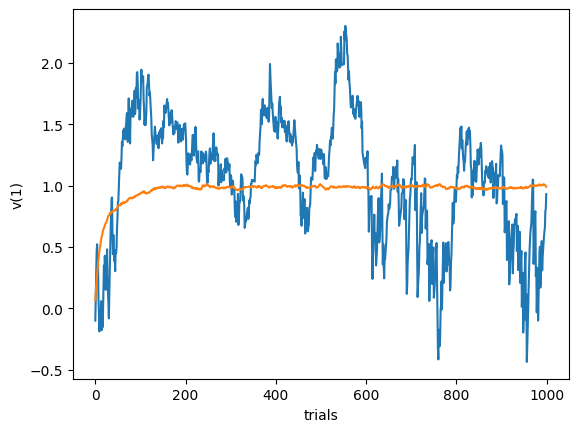

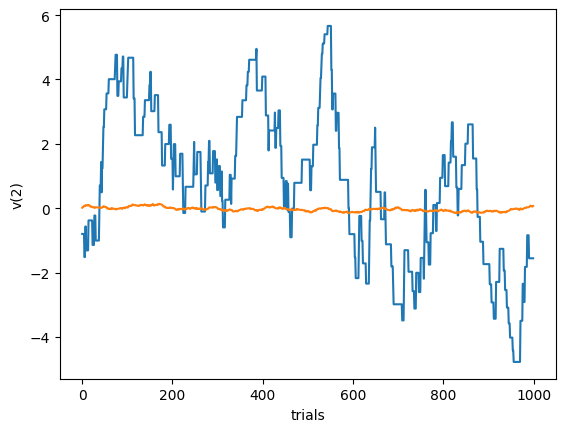

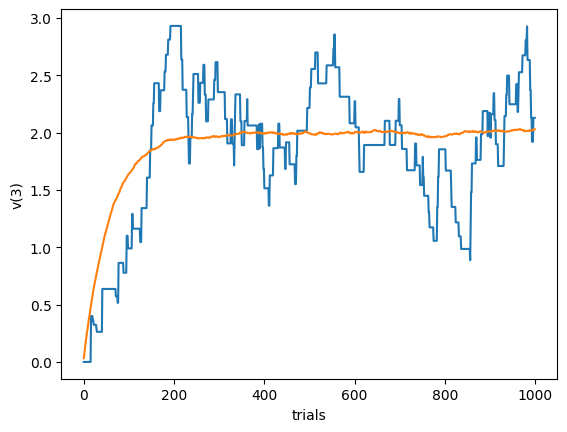

In [10]:
import numpy as np
import matplotlib.pyplot as plt

class Environment:
    def __init__(self) -> None:
        self.current_state = 0
        self.is_terminated = False

    def reset(self):
        self.current_state = 0
        self.is_terminated = True

    def start_new_trial(self):
        self.is_terminated = False

    def get_current_state(self):
        return self.current_state

    def get_reward_for_action(self, action):
        reward_mapping = {0: [1, 2, -1], 1: [8, -8], 2: [0, 4]}
        return reward_mapping.get(self.current_state, [0])[action]

    def take_action(self, action):
        self.is_terminated = False
        reward = self.get_reward_for_action(action)
        if self.current_state == 0:
            if action < 2:
                # There is no further state if A or B is chosen
                self.reset()
            else:
                # Random transition to the left or right if C is chosen
                self.current_state = np.random.randint(1, 3)
        else:
            # There is no further state after state 1
            self.reset()
        return reward


class Agent:
    def __init__(self, environment, epsilon_actor=0.075, policy_type="random",epsilon_critic=0.2, decay=0, beta=1) -> None:
        self.values = np.zeros(3)
        self.memory = [[0, 0, 0], [0, 0], [0, 0]]
        self.policy = [[1/3, 1/3, 1/3], [0.5, 0.5], [0.5, 0.5]]
        self.environment = environment
        self.epsilon_actor = epsilon_actor
        self.epsilon_critic = epsilon_critic
        self.decay = decay
        self.beta = beta

    def reset_agent(self):
        # Reset at the start of a new epoch
        self.values = np.zeros(3)
        self.memory = [[0, 0, 0], [0, 0], [0, 0]]
        self.policy = [[1/3, 1/3, 1/3], [0.5, 0.5], [0.5, 0.5]]

    def critic(self):
        return self.values

    def update_policy(self, state, reward, new_state, action):
        if action < 2:
            delta = reward - self.values[state]
        else:
            delta = reward + self.values[new_state] - self.values[state]
        for a in range(len(self.memory[state])):
            self.memory[state][a] = (1 - self.decay) * self.memory[state][a] + self.epsilon_actor * self.delta_func(action, a) * delta
            self.policy[state] = self.softmax(self.memory[state])
        return self.policy

    def update_weights(self, reward, state, new_state):
        if new_state != 0:
            delta = reward + self.values[new_state] - self.values[state]
        else:
            delta = reward - self.values[state]

        self.values[state] += self.epsilon_critic * delta

        return self.values

    def softmax(self, x):
        for i in range(len(x)):
            x[i] = self.beta * x[i]
        return np.exp(x) / np.exp(x).sum()

    def delta_func(self, a, b):
        return a == b


# Policy evaluation for "choice" environment
trials = 1000
epochs = 1000
epsilon = 0.1

env = Environment()
agent = Agent(environment=env, epsilon_actor=epsilon, epsilon_critic=epsilon)
v_hist = np.zeros((epochs, trials, 3))

for epoch in range(epochs):
    agent.reset_agent()

    for trial in range(trials):
        for step in range(2):
            if not env.is_terminated:
                state = env.current_state
                v = agent.values
                action = np.random.choice(np.arange(3), p=agent.policy[state]) if state == 0 else np.random.choice(np.arange(2), p=agent.policy[state])
                reward = env.take_action(action)
                new_state = env.current_state
                if new_state != 0:
                    delta = reward + agent.values[new_state] - agent.values[state]
                else:
                    delta = reward - agent.values[state]

                agent.values[state] += agent.epsilon_critic * delta

        v_hist[epoch, trial] = v
        env.start_new_trial()

# Plot policy evaluation for "choice" environment
for action in range(3):
    means = np.mean(v_hist[:, :, action], axis=0)
    
    plt.plot(range(epochs), v_hist[0, :, action])
    plt.plot(range(epochs), means)

    plt.xlabel("trials")
    plt.ylabel(f"v({action + 1})")
    plt.show()


In [11]:


# Policy evaluation for "choice" environment
trials = 1000
epochs = 1000
epsilon = 0.2
epsilon_actor = 0.075
beta = 1

env = Environment()
agent = Agent(environment=env, epsilon_actor=epsilon_actor, epsilon_critic=epsilon, beta=beta)
v_hist = np.zeros((epochs, trials, 3))
policy_hist = np.zeros((epochs, trials, 7))

for epoch in range(epochs):
    agent.reset_agent()

    for trial in range(trials):
        for step in range(2):
            if not env.is_terminated:
                state = env.current_state
                v = agent.values
                action = np.random.choice(np.arange(3), p=agent.policy[state]) if state == 0 else np.random.choice(np.arange(2), p=agent.policy[state])
                reward = env.take_action(action)
                new_state = env.current_state
                policy = agent.update_policy(state, reward, new_state, action)
                if new_state != 0:
                    delta = reward + agent.values[new_state] - agent.values[state]
                else:
                    delta = reward - agent.values[state]

                agent.values[state] += agent.epsilon_critic * delta

        v_hist[epoch, trial] = v
        policy_hist[epoch, trial] = np.concatenate((policy[0], policy[1], policy[2]))
        env.start_new_trial()




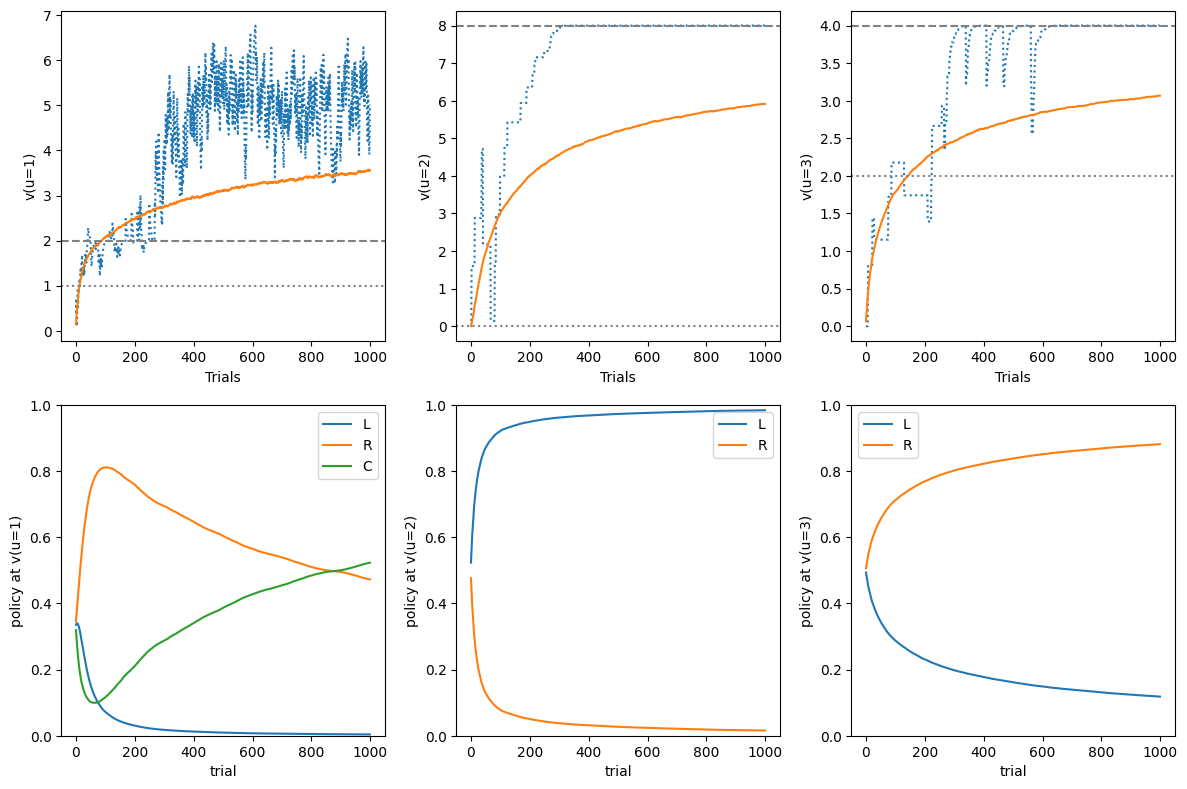

In [25]:
fig, axs = plt.subplots(2, 3, figsize=(12, 8))

maxima = [2,8,4]
average_future_rewards = [1,0,2]

# Upper plots (v(u))
for action in range(3):
    means = np.mean(v_hist[:, :, action], axis=0)
    
    axs[0, action].plot(range(epochs), v_hist[0, :, action], linestyle='dotted')
    axs[0, action].plot(range(epochs), means, label="Mean")
    axs[0, action].axhline(y=maxima[action], color='grey', linestyle='dashed')  
    axs[0, action].axhline(y=average_future_rewards[action], color='grey', linestyle='dotted')

    axs[0, action].set_xlabel("Trials")
    axs[0, action].set_ylabel(f"v(u={action + 1})")

# Plot policies for v(u=1)
mean_policy_over_epochs_1 = np.mean(policy_hist[:, :, :3], axis=0)
axs[1, 0].plot(range(epochs), mean_policy_over_epochs_1[:, 0], label="L")
axs[1, 0].plot(range(epochs), mean_policy_over_epochs_1[:, 1], label="R")
axs[1, 0].plot(range(epochs), mean_policy_over_epochs_1[:, 2], label="C")
axs[1, 0].set_xlabel("trial")
axs[1, 0].set_ylabel("policy at v(u=1)")
axs[1, 0].set_ylim(0,1)
axs[1, 0].legend()

# Plot policies for v(u=2)
mean_policy_over_epochs_2 = np.mean(policy_hist[:, :, 3:5], axis=0)
axs[1, 1].plot(range(epochs), mean_policy_over_epochs_2[:, 0], label="L")
axs[1, 1].plot(range(epochs), mean_policy_over_epochs_2[:, 1], label="R")
axs[1, 1].set_xlabel("trial")
axs[1, 1].set_ylabel("policy at v(u=2)")
axs[1, 1].set_ylim(0,1)
axs[1, 1].legend()

# Plot policies for v(u=3)
mean_policy_over_epochs_3 = np.mean(policy_hist[:, :, 5:7], axis=0)
axs[1, 2].plot(range(epochs), mean_policy_over_epochs_3[:, 0], label="L")
axs[1, 2].plot(range(epochs), mean_policy_over_epochs_3[:, 1], label="R")
axs[1, 2].set_xlabel("trial")
axs[1, 2].set_ylabel("policy at v(u=3)")
axs[1, 2].set_ylim(0,1)
axs[1, 2].legend()

plt.tight_layout()
plt.show()


In [33]:
import numpy as np
import matplotlib.pyplot as plt

class BaseEnvironment:
    def __init__(self) -> None:
        self.state = 0
        self.terminated = False

    def reset(self):
        self.state = 0
        self.terminated = True

    def new_ep(self):
        self.terminated = False

    def get_state(self):
        return self.state

    def take_step(self, action):
        raise NotImplementedError("Subclasses must implement this method.")

class NormalEnvironment(BaseEnvironment):
    def get_reward(self, action):
        if self.state == 0:
            reward = 0
        elif self.state == 1:
            rewards = [4, 0]
            reward = rewards[action]
        elif self.state == 2:
            rewards = [2, 3]
            reward = rewards[action]
        return reward

    def take_step(self, action):
        self.terminated = False
        reward = self.get_reward(action)
        if self.state == 0:
                if action < 2:
                    # there is no further state
                    self.reset()
                else:
                    #random transition to left or right if C is chosen
                    self.state = np.random.randint(1,3)
        else:
                # there is no further state
            self.reset()
        return reward

class MazeEnvironment(BaseEnvironment):
    def get_reward(self, action):
        if self.state == 0:
            reward = 0
        elif self.state == 1:
            rewards = [4,0]
            reward = rewards[action]
        elif self.state == 2:
            rewards = [2,3]
            reward = rewards[action]
        return reward

    def take_step(self,  action):
        self.terminated = False
        reward = self.get_reward(action)
        if self.state == 0:
            self.state = self.state + 1 + action
        else:
            # there is no further state
            self.reset()
        return reward

import numpy as np

class BaseAgent:
    def __init__(self, env, epsilon_a=0.075, policy_type="random", epsilon_c=0.2, decay=0, beta=1) -> None:
        self.vs = np.zeros(3)
        #self.policy = [[0.5, 0.5], [0.5, 0.5], [0.5, 0.5]]
        self.policy_type = policy_type
        self.env = env
        self.epsilon_a = epsilon_a
        self.epsilon_c = epsilon_c
        self.decay = decay
        self.beta = beta

    def reset(self):
        # reset at the start of a new epoch
        #self.vs = np.zeros(3)
        #self.policy = [[0.5, 0.5], [0.5, 0.5], [0.5, 0.5]]
        raise NotImplementedError("Subclasses must implement this method.")

    def critic(self):
        return self.vs

    def actor(self):
        raise NotImplementedError("Subclasses must implement this method.")

    def update_policy(self, state, reward, new_state, action):
        raise NotImplementedError("Subclasses must implement this method.")

    def update_weights(self, reward, state, new_state):
        raise NotImplementedError("Subclasses must implement this method.")

    def softmax(self, x):
        for i in range(len(x)):
            x[i] = self.beta * x[i]
        return np.exp(x) / np.exp(x).sum()

    def delta_func(self, a, b):
        return a == b

class ChoiceAgent(BaseAgent):
    def __init__(self, env, epsilon_a=0.075, policy_type="random", epsilon_c=0.2, decay=0, beta=1) -> None:
        super().__init__(env, epsilon_a, policy_type, epsilon_c, decay, beta)
        self.ms = [[0, 0, 0], [0, 0], [0, 0]]
        self.policy = [[1/3, 1/3, 1/3], [0.5, 0.5], [0.5, 0.5]]

    def reset(self):
        # Reset at the start of a new epoch
        self.values = np.zeros(3)
        self.memory = [[0, 0, 0], [0, 0], [0, 0]]
        self.policy = [[1/3, 1/3, 1/3], [0.5, 0.5], [0.5, 0.5]]

    def actor(self):
        state = self.env.get_state()
        if state == 0:
            action = np.random.choice(np.arange(3), p=self.policy[state])
        else:
            action = np.random.choice(np.arange(2), p=self.policy[state][0:2])  # Adjusted here
        return action

    def update_policy(self, state, reward, new_state, action):
        if action < 2:
            delta = reward - self.vs[state]
        else:
            delta = reward + self.vs[new_state] - self.vs[state]
        for a in range(len(self.ms[state])):
            self.ms[state][a] = (1 - self.decay) * self.ms[state][a] + self.epsilon_a * self.delta_func(action, a) * delta
            self.policy[state] = self.softmax(self.ms[state])
        return self.policy

    def update_weights(self, reward, state, new_state):
        if new_state != 0:
            delta = reward + self.vs[new_state] - self.vs[state]
        else:
            delta = reward - self.vs[state]

        self.vs[state] += self.epsilon_c * delta

        return self.vs

class MazeAgent(BaseAgent):
    def __init__(self, env, epsilon_a=0.075, policy_type="random", epsilon_c=0.2, decay=0, beta=1) -> None:
        super().__init__(env, epsilon_a, policy_type, epsilon_c, decay, beta)
        self.ms = [[0, 0], [0, 0], [0, 0]]
        self.policy = [[0.5, 0.5], [0.5, 0.5], [0.5, 0.5]]

    def actor(self):
        state = self.env.get_state()
        action = np.random.choice(np.arange(2), p=self.policy[state])
        return action

    def update_policy(self, state, reward, new_state, action):
        if state == 0:
            delta = reward + self.vs[new_state] - self.vs[state]
        else:
            delta = reward - self.vs[state]
        for a in range(len(self.ms[state])):
            self.ms[state][a] = (1 - self.decay) * self.ms[state][a] + self.epsilon_a * self.delta_func(action, a) * delta
            self.policy[state] = self.softmax(self.ms[state])
        return self.policy

    def update_weights(self, reward, state, new_state):
        if state == 0:
            delta = reward + self.vs[new_state] - self.vs[state]
        else:
            delta = reward - self.vs[state]

        self.vs[state] += self.epsilon_c * delta

        return self.vs


# policy evaluation for "maze" environment
episodes = 1000
epochs = 1000
epsilon = 0.1

env_normal = NormalEnvironment()
agent_normal = ChoiceAgent(env=env_normal, epsilon_a=epsilon, policy_type="actor_critic")
v_hist = np.zeros((epochs, episodes, 3))
policy_hist = np.zeros((epochs, episodes, 7))

for epoch in range(epochs):
    agent_normal.reset()

    for episode in range(episodes):
        for step in range(2):
            if env_normal.terminated == False:
                state = env_normal.state
                v = agent_normal.vs
                if state == 0:
                    action = np.random.choice(np.arange(3), p=agent_normal.policy[state])
                else:
                    action = np.random.choice(np.arange(2), p=agent_normal.policy[state])
                reward = env_normal.take_step(action)
                new_state = env_normal.state
                policy = agent_normal.update_policy(state, reward, new_state, action)
                if new_state != 0:
                    delta = reward + agent_normal.values[new_state] - agent_normal.values[state]
                else:
                    delta = reward - agent_normal.values[state]

                agent_normal.values[state] += agent_normal.epsilon_c * delta

        v_hist[epoch,episode] = v
        policy_hist[epoch, episode] = np.concatenate((policy[0], policy[1], policy[2]))
        env_normal.new_ep()

# plot policy evaluation for "normal" environment
means_per_epoch_1_pe_normal = np.mean(v_hist[:, :, 0], axis=0)
plt.plot(range(epochs), v_hist[0, :, 0])
plt.plot(range(epochs), means_per_epoch_1_pe_normal)
plt.xlabel("Episode")
plt.ylabel("v(u=1) - Normal")
plt.show()

means_per_epoch_2_pe_normal = np.mean(v_hist[:, :, 1], axis=0)
plt.plot(range(epochs), v_hist[0, :, 1])
plt.plot(range(epochs), means_per_epoch_2_pe_normal)
plt.xlabel("Episode")
plt.ylabel("v(u=2) - Normal")
plt.show()

means_per_epoch_3_pe_normal = np.mean(v_hist[:, :, 2], axis=0)
plt.plot(range(epochs), v_hist[0, :, 2])
plt.plot(range(epochs), means_per_epoch_3_pe_normal)
plt.xlabel("Episode")
plt.ylabel("v(u=3) - Normal")
plt.show()

# policy evaluation for "maze" environment
episodes = 1000
epochs = 1000
epsilon = 0.1

env_maze = MazeEnvironment()
agent_maze = MazeAgent(env=env_maze, epsilon_a=epsilon, policy_type="actor_critic")
v_over_epochs_pe_maze = np.zeros((epochs, episodes, 3))
for epoch in range(epochs):
    agent_maze.reset()

    for episode in range(episodes):
        for step in range(2):
            if env_maze.terminated == False:
                state = env_maze.get_state()
                vs = agent_maze.critic()
                action = agent_maze.actor()
                reward = env_maze.take_step(action)
                new_state = env_maze.get_state()
                agent_maze.update_weights(reward, state, new_state)

        v_over_epochs_pe_maze[epoch, episode] = vs
        env_maze.new_ep()

# plot policy evaluation for "maze" environment
means_per_epoch_1_pe_maze = np.mean(v_over_epochs_pe_maze[:, :, 0], axis=0)
plt.plot(range(epochs), v_over_epochs_pe_maze[0, :, 0])
plt.plot(range(epochs), means_per_epoch_1_pe_maze)
plt.xlabel("Episode")
plt.ylabel("v(u=1) - Maze")
plt.show()

means_per_epoch_2_pe_maze = np.mean(v_over_epochs_pe_maze[:, :, 1], axis=0)
plt.plot(range(epochs), v_over_epochs_pe_maze[0, :, 1])
plt.plot(range(epochs), means_per_epoch_2_pe_maze)
plt.xlabel("Episode")
plt.ylabel("v(u=2) - Maze")
plt.show()

means_per_epoch_3_pe_maze = np.mean(v_over_epochs_pe_maze[:, :, 2], axis=0)
plt.plot(range(epochs), v_over_epochs_pe_maze[0, :, 2])
plt.plot(range(epochs), means_per_epoch_3_pe_maze)
plt.xlabel("Episode")
plt.ylabel("v(u=3) - Maze")
plt.show()


/var/folders/dx/zswlyk812zq8m7h3crzgxx9r0000gn/T/ipykernel_50808/3290623192.py:105: RuntimeWarning: overflow encountered in exp
  return np.exp(x) / np.exp(x).sum()
/var/folders/dx/zswlyk812zq8m7h3crzgxx9r0000gn/T/ipykernel_50808/3290623192.py:105: RuntimeWarning: invalid value encountered in divide
  return np.exp(x) / np.exp(x).sum()


ValueError: probabilities contain NaN